In [3]:
!pip3 install pandas matplotlib seaborn fpdf

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 4.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.5 MB 6.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.5 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 6.0 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 6.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.5 MB 4.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.5 MB 4.5 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.5 MB 3.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.5 MB 3.4 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import fpdf

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
print("Merged Dataset Summary:\n", merged_data.describe())
print("\nMissing values:\n", merged_data.isnull().sum())

Merged Dataset Summary:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              

In [7]:
print("\nCustomers Dataset:\n", customers.info())
print("\nProducts Dataset:\n", products.info())
print("\nTransactions Dataset:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB

Customers Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Products Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data c

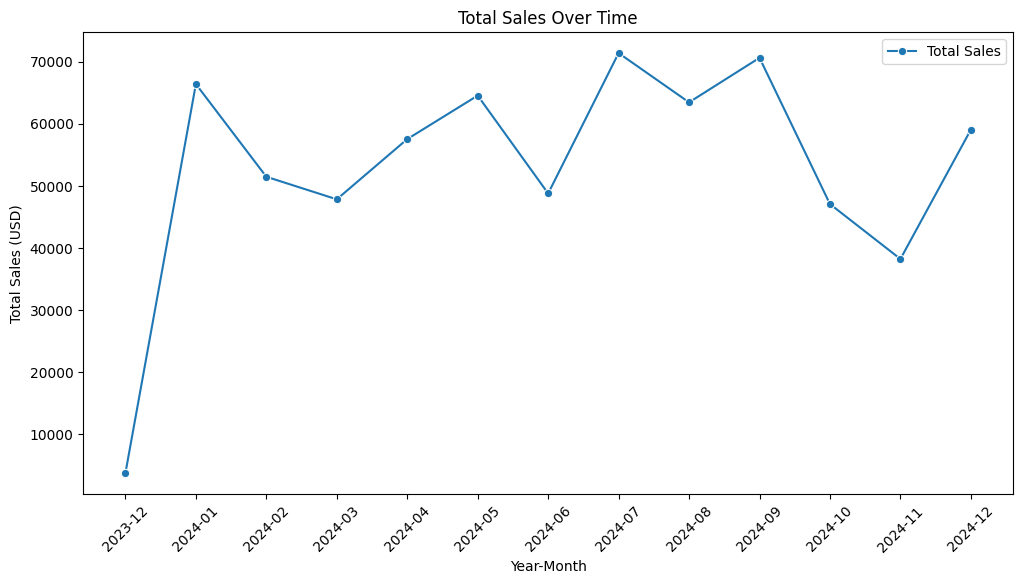

In [12]:
# 1. Total sales and number of transactions over time
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trend = merged_data.groupby('YearMonth').agg({'TotalValue': 'sum', 'TransactionID': 'count'}).reset_index()
sales_trend.columns = ['YearMonth', 'TotalSales', 'TransactionCount']
sales_trend['YearMonth'] = sales_trend['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='YearMonth', y='TotalSales', marker='o', label='Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (USD)')
plt.xlabel('Year-Month')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12112\3008818137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, y='ProductName', x='TotalValue', palette='viridis')


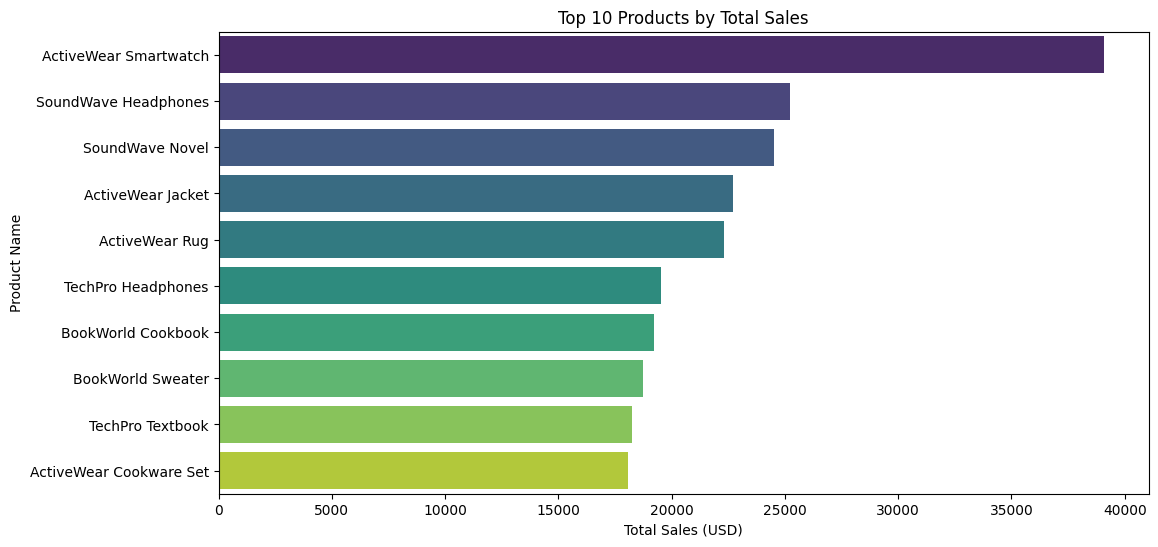

In [13]:
# 2. Top 10 Products by Sales
product_sales = merged_data.groupby('ProductName').agg({'TotalValue': 'sum'}).reset_index()
product_sales = product_sales.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, y='ProductName', x='TotalValue', palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12112\1578756274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='TotalValue', y='Region', palette='muted')


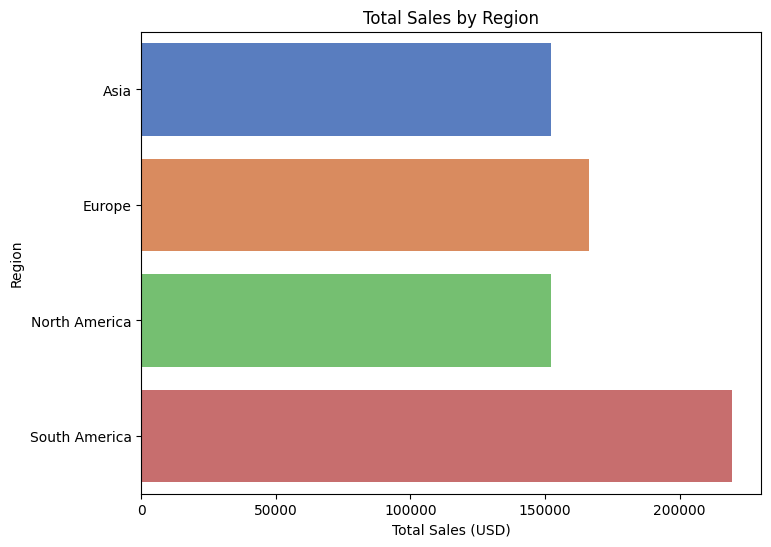

In [14]:
# 3. Sales Distribution by Region
region_sales = merged_data.groupby('Region').agg({'TotalValue': 'sum'}).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x='TotalValue', y='Region', palette='muted')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Region')
plt.show()


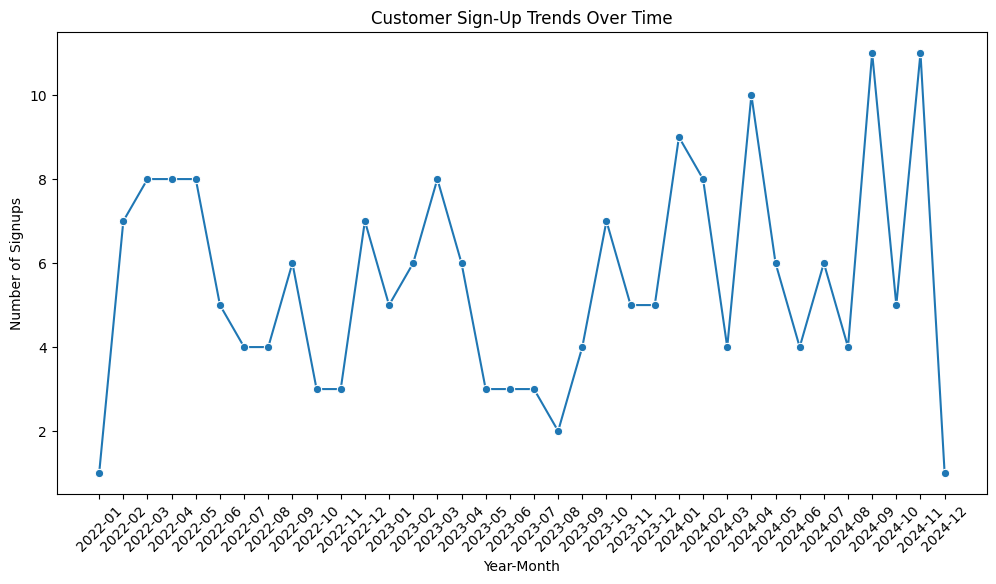

In [16]:
# 4. Customer Sign-Up Trends
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size().reset_index(name='Signups')
signup_trend['SignupDate'] = signup_trend['SignupDate'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trend, x='SignupDate', y='Signups', marker='o')
plt.title('Customer Sign-Up Trends Over Time')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12112\4112181401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_price, x='Price', y='Category', palette='coolwarm')


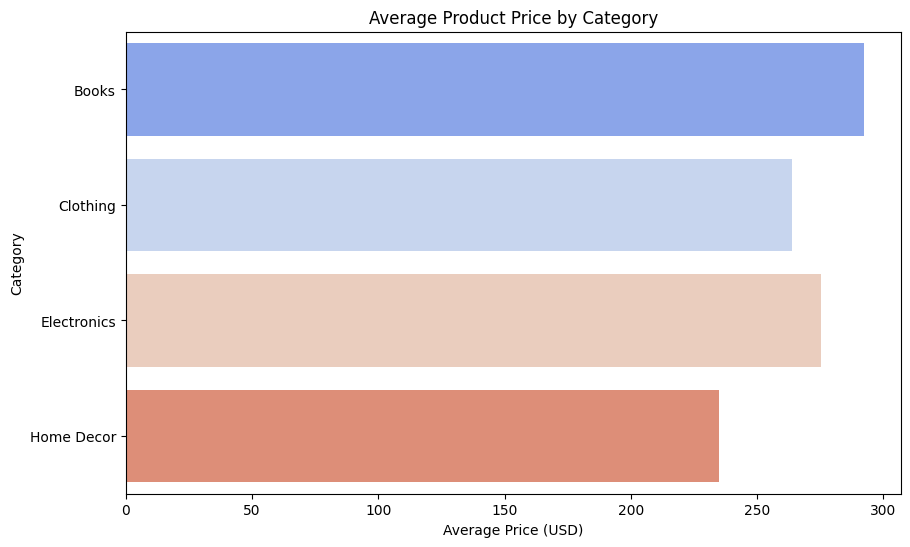

In [17]:
category_price = products.groupby('Category').agg({'Price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_price, x='Price', y='Category', palette='coolwarm')
plt.title('Average Product Price by Category')
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')
plt.show()

In [20]:
# Business Insights
insights = """Case 1: Total Sales and Transactions Over Time
Sales show a fluctuating trend with peaks and troughs over the observed period.  Understanding the external factors influencing these fluctuations (e.g., seasonality, marketing campaigns, economic conditions) is crucial.  The correlation between sales and transaction count should be examined to determine if average transaction value is also changing, which could indicate shifts in customer purchasing behavior. Further investigation into low-performing periods is needed to identify actionable opportunities for improvement.
\n
Case 2: Top 10 Products by Sales
The top 10 products represent a significant portion of overall revenue.  Focusing marketing efforts and inventory management on these key performers is critical.  Analyzing the characteristics of these top sellers (e.g., price point, category, customer demographics) can reveal valuable insights for product development and targeted promotions.  Monitoring their performance over time is essential to maintain their market position.
\n
Case 3: Sales Distribution by Region
Regional sales variations indicate differing market potentials.  Regions with higher sales demonstrate stronger market penetration and could be leveraged as models for expansion.  Conversely, underperforming regions require targeted strategies, potentially including localized marketing campaigns or adjustments to product offerings to better suit local preferences and needs.  Understanding regional demographics and economic conditions can inform these targeted interventions.
\n
Case 4: Customer Sign-Up Trends
Customer sign-ups exhibit a pattern, with fluctuations over time, potentially linked to marketing efforts or seasonal factors.  Identifying periods of high growth can be leveraged to understand what worked well, informing future marketing strategies. Slowdown periods require investigation into potential obstacles to customer acquisition, such as competitor activity or market saturation.  Optimizing marketing spend based on these trends will improve ROI.
\n
Case 5: Average Product Price by Category
Category-based price variations provide an overview of product positioning.  Higher-priced categories may target a niche or premium market.  Analyzing sales volumes within each category helps determine the effectiveness of pricing strategies and price elasticity of demand.  This information can inform decisions regarding product pricing, and the introduction of products at different price points within and across categories."""

print(insights)

Case 1: Total Sales and Transactions Over Time
Sales show a fluctuating trend with peaks and troughs over the observed period.  Understanding the external factors influencing these fluctuations (e.g., seasonality, marketing campaigns, economic conditions) is crucial.  The correlation between sales and transaction count should be examined to determine if average transaction value is also changing, which could indicate shifts in customer purchasing behavior. Further investigation into low-performing periods is needed to identify actionable opportunities for improvement.


Case 2: Top 10 Products by Sales
The top 10 products represent a significant portion of overall revenue.  Focusing marketing efforts and inventory management on these key performers is critical.  Analyzing the characteristics of these top sellers (e.g., price point, category, customer demographics) can reveal valuable insights for product development and targeted promotions.  Monitoring their performance over time is es

In [11]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Business Insights Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)


pdf = PDF()
pdf.add_page()
pdf.chapter_title('Case 1: Total Sales and Transactions Over Time')
pdf.image('total_sale.png', w=180, h=90)
pdf.chapter_body('Sales show a fluctuating trend with peaks and troughs over the observed period.  Understanding the external factors influencing these fluctuations (e.g., seasonality, marketing campaigns, economic conditions) is crucial.  The correlation between sales and transaction count should be examined to determine if average transaction value is also changing, which could indicate shifts in customer purchasing behavior. Further investigation into low-performing periods is needed to identify actionable opportunities for improvement.')

pdf.chapter_title('Case 2: Top 10 Products by Sales')
pdf.image('top10.png', w=160, h=80)
pdf.chapter_body('The top 10 products represent a significant portion of overall revenue.  Focusing marketing efforts and inventory management on these key performers is critical.  Analyzing the characteristics of these top sellers (e.g., price point, category, customer demographics) can reveal valuable insights for product development and targeted promotions.  Monitoring their performance over time is essential to maintain their market position.')

pdf.chapter_title('Case 3: Sales Distribution by Region')
pdf.image('regionsale.png', w=170, h=127.5)
pdf.chapter_body('Regional sales variations indicate differing market potentials.  Regions with higher sales demonstrate stronger market penetration and could be leveraged as models for expansion.  Conversely, underperforming regions require targeted strategies, potentially including localized marketing campaigns or adjustments to product offerings to better suit local preferences and needs.  Understanding regional demographics and economic conditions can inform these targeted interventions.')

pdf.chapter_title('Case 4: Customer Sign-Up Trends')
pdf.image('customer_signup.png', w=180, h=90)
pdf.chapter_body('Customer sign-ups exhibit a pattern, with fluctuations over time, potentially linked to marketing efforts or seasonal factors.  Identifying periods of high growth can be leveraged to understand what worked well, informing future marketing strategies. Slowdown periods require investigation into potential obstacles to customer acquisition, such as competitor activity or market saturation.  Optimizing marketing spend based on these trends will improve ROI.')

pdf.chapter_title('Case 5: Average Product Price by Category')
pdf.image('avgprice.png', w=150, h=90)
pdf.chapter_body('Category-based price variations provide an overview of product positioning.  Higher-priced categories may target a niche or premium market.  Analyzing sales volumes within each category helps determine the effectiveness of pricing strategies and price elasticity of demand.  This information can inform decisions regarding product pricing, and the introduction of products at different price points within and across categories.')

pdf.output('Anuneet_Rastogi_EDA.pdf')

''